# ML Steps

1. Import the data
2. Clean the data
3. Split the data: Training set/Test set
4. Create a model
5. Check output
6. Improve

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')

In [2]:
#Describing features
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [3]:
df.values

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '€226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '€127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '€228.1M'],
       ...,
       [18204, 241638, 'B. Worman', ..., 6.0, 13.0, '€165K'],
       [18205, 246268, 'D. Walker-Rice', ..., 8.0, 9.0, '€143K'],
       [18206, 246269, 'G. Nugent', ..., 12.0, 9.0, '€165K']],
      dtype=object)

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


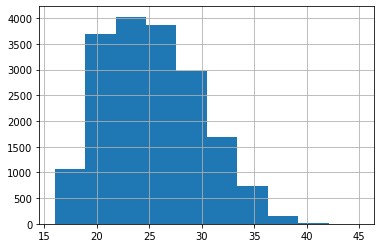

In [5]:
df['Age'].hist()

In [6]:
#Unique Values
df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [7]:
#Filtering
df[df['Age']>30]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17842,17842,182461,Zhou Ting,39,https://cdn.sofifa.org/players/4/19/182461.png,China PR,https://cdn.sofifa.org/flags/155.png,52,52,Dalian YiFang FC,...,52.0,17.0,45.0,44.0,10.0,12.0,7.0,15.0,6.0,€22K
17866,17866,232676,N. Hatta,32,https://cdn.sofifa.org/players/4/19/232676.png,Japan,https://cdn.sofifa.org/flags/163.png,52,52,Júbilo Iwata,...,24.0,30.0,12.0,13.0,54.0,48.0,45.0,52.0,54.0,€38K
18043,18043,237917,A. Suzuki,31,https://cdn.sofifa.org/players/4/19/237917.png,Japan,https://cdn.sofifa.org/flags/163.png,50,50,Yokohama F. Marinos,...,31.0,13.0,10.0,14.0,49.0,48.0,54.0,52.0,54.0,€25K
18171,18171,237746,Y. Uchimura,33,https://cdn.sofifa.org/players/4/19/237746.png,Japan,https://cdn.sofifa.org/flags/163.png,48,48,Hokkaido Consadole Sapporo,...,62.0,45.0,48.0,42.0,13.0,15.0,7.0,15.0,15.0,€25K


In [8]:
# Sorting

df.sort_values('Age',ascending=False).head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4741,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K
18183,18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,NaN
17726,17726,51963,T. Warner,44,https://cdn.sofifa.org/players/4/19/51963.png,Trinidad & Tobago,https://cdn.sofifa.org/flags/93.png,53,53,Accrington Stanley,...,46.0,19.0,15.0,14.0,48.0,56.0,56.0,60.0,44.0,NaN
10545,10545,140183,S. Narazaki,42,https://cdn.sofifa.org/players/4/19/140183.png,Japan,https://cdn.sofifa.org/flags/163.png,65,65,Nagoya Grampus,...,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,€50K
7225,7225,142998,C. Muñoz,41,https://cdn.sofifa.org/players/4/19/142998.png,Argentina,https://cdn.sofifa.org/flags/52.png,68,68,CD Universidad de Concepción,...,62.0,18.0,14.0,19.0,67.0,65.0,68.0,71.0,68.0,€84K


In [9]:
# Grouping
group = df.groupby('Club')
group.mean()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Club,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,9405.310345,219059.413793,25.655172,65.586207,69.310345,1540.689655,1.000000,3.103448,2.241379,17.000000,...,45.862069,56.379310,49.344828,45.172414,42.965517,15.965517,16.172414,14.724138,16.103448,16.206897
1. FC Heidenheim 1846,9278.428571,219734.142857,24.000000,65.750000,71.928571,1563.714286,1.000000,2.964286,2.321429,20.928571,...,46.642857,56.250000,44.107143,46.678571,44.321429,17.357143,16.821429,14.928571,17.035714,16.142857
1. FC Kaiserslautern,11495.692308,220848.230769,23.846154,63.384615,69.884615,1524.269231,1.000000,3.153846,2.230769,16.769231,...,45.923077,52.846154,42.307692,44.230769,44.038462,16.000000,15.346154,14.923077,15.192308,15.038462
1. FC Köln,5241.035714,208388.714286,24.321429,70.785714,76.571429,1671.678571,1.321429,3.035714,2.428571,18.107143,...,50.464286,61.821429,52.642857,52.535714,49.214286,18.607143,17.642857,19.321429,17.857143,17.964286
1. FC Magdeburg,9514.115385,226487.961538,24.692308,65.615385,70.346154,1532.692308,1.038462,3.307692,2.115385,16.538462,...,46.384615,52.730769,46.730769,46.423077,44.884615,15.615385,16.538462,15.692308,15.615385,17.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zagłębie Sosnowiec,13864.840000,219129.880000,26.240000,60.760000,64.640000,1494.840000,1.000000,2.640000,2.040000,29.240000,...,44.520000,54.840000,48.760000,47.480000,46.240000,17.080000,15.640000,16.680000,15.640000,16.520000
Çaykur Rizespor,8332.900000,211290.833333,25.433333,66.900000,71.666667,1624.400000,1.000000,2.733333,2.366667,28.466667,...,50.366667,56.866667,46.066667,50.033333,48.833333,17.133333,18.133333,17.600000,17.866667,17.566667
Örebro SK,13289.296296,224120.185185,24.037037,60.481481,66.518519,1454.592593,1.000000,2.518519,2.111111,23.185185,...,41.777778,54.148148,43.333333,40.074074,38.629630,15.629630,15.518519,14.629630,16.074074,15.666667


In [10]:
# Selecting rows
df.iloc[0,:]

Unnamed: 0                                                     0
ID                                                        158023
Name                                                    L. Messi
Age                                                           31
Photo             https://cdn.sofifa.org/players/4/19/158023.png
                                       ...                      
GKHandling                                                    11
GKKicking                                                     15
GKPositioning                                                 14
GKReflexes                                                     8
Release Clause                                           €226.5M
Name: 0, Length: 89, dtype: object

In [11]:
df.iloc[0,1]

158023

In [12]:
# Task: find the underpaid players

df1 = pd.DataFrame(df,columns=['Name','Wage','Value'])

# Convert string to integer
         
def value_to_float(x):
    
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    
    return 0.0

wage = df1['Wage'].replace('[\€,]','',regex=True).apply(value_to_float)
value = df1['Value'].replace('[\€,]','',regex=True).apply(value_to_float)

df1['Value'] = value
df1['Wage'] = wage
         

df1['Difference'] = df1['Value'] - df1['Wage']
df1.sort_values('Difference',ascending=False)

,Name,Wage,Value,Difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,1000.0,0.0,-1000.0
12192,H. Sulaimani,3000.0,0.0,-3000.0
3550,S. Nakamura,4000.0,0.0,-4000.0
4228,B. Nivet,5000.0,0.0,-5000.0


In [ ]:
# Visualize the data

import seaborn as sns
sns.set()
graph = sns.scatterplot('Wage',y='Value',data=df1)

In [ ]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

TOOLTIPS = [
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name"),
]

p = figure(title="Soccer 2019", x_axis_label='Wage', y_axis_label='Value',plot_width=700,plot_height=700,tooltips=TOOLTIPS)
p.circle('Wage','Value',size=10,source=df1,fill_color='teal',line_color=None)
show(p)